In [98]:
import pandas as pd

df2018 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY18') 
df2018.dropna(inplace=True)
df2019 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY19') 
df2019.dropna(inplace=True)
df2020 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY20') 
df2020.dropna(inplace=True)
df2021 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY21') 
df2021.dropna(inplace=True)

In [99]:
len(df2018.columns),len(df2019.columns),len(df2020.columns),len(df2021.columns)

(34, 34, 34, 34)

In [100]:
df= pd.concat([df2018,df2019,df2020,df2021])

In [101]:
df.columns=['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order']

In [102]:
df_reduced = df[['main_price',  'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ']]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, FY18 to FY21
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_price         893 non-null    int64  
 1   CED EPD            893 non-null    float64
 2   BW EPD             893 non-null    float64
 3   WW EPD             893 non-null    float64
 4   YW EPD             893 non-null    float64
 5   RADG EPD           893 non-null    float64
 6   DMI EPD            893 non-null    float64
 7   YH EPD             893 non-null    float64
 8   SC EPD             893 non-null    float64
 9   Doc EPD            893 non-null    float64
 10  HP EPD             893 non-null    float64
 11  CEM EPD            893 non-null    float64
 12  Milk EPD           893 non-null    float64
 13  MW EPD             893 non-null    float64
 14  MH EPD             893 non-null    float64
 15  $EN                893 non-null    float64
 16  CW EPD             893 non-

In [125]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(18, 18))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [104]:
# standarize
def standarize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        result[symbol] = (df[symbol] -mean_value) / std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

Text(0.5, 1.0, 'Distribution of Main Price')

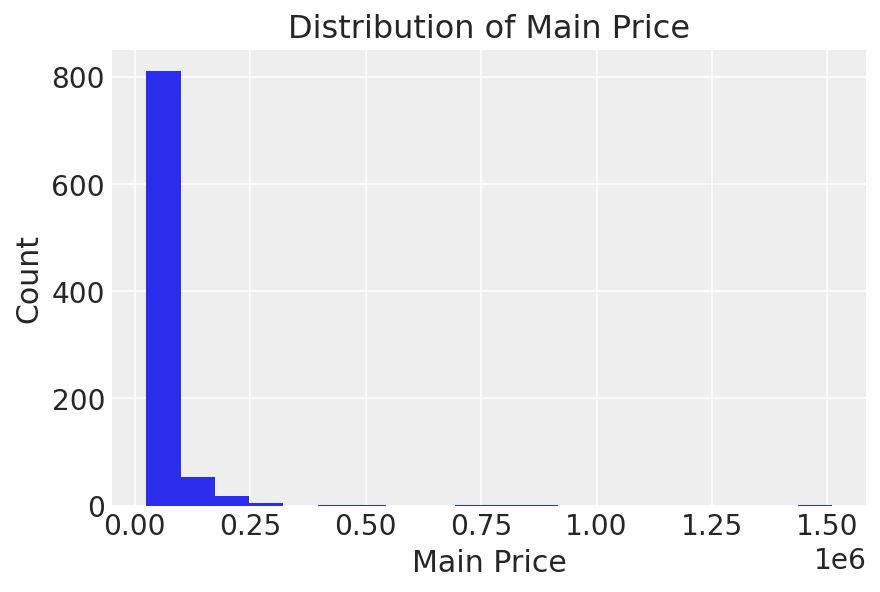

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [109]:
df_reduced['main_price'].min(), df_reduced['main_price'].max()

(25000, 1510000)

In [123]:
d750=df_reduced['main_price'].quantile(q=0.750)
d500=df_reduced['main_price'].quantile(q=0.500)
d250=df_reduced['main_price'].quantile(q=0.250)
dmin=df_reduced['main_price'].min()
dmax=df_reduced['main_price'].max()
dmin, d250, d500, d750, dmax

(25000, 29000.0, 35000.0, 50000.0, 1510000)

In [121]:
df_reduced_q1=df_reduced[(df_reduced.main_price <d250)]
df_reduced_q2=df_reduced[(df_reduced.main_price >=d250)& (df_reduced.main_price <d500)]
df_reduced_q3=df_reduced[(df_reduced.main_price >=d500)& (df_reduced.main_price <d750)]
df_reduced_q4=df_reduced[(df_reduced.main_price >=d750)]


In [260]:
len(df_reduced_q1),len(df_reduced_q2),len(df_reduced_q3),len(df_reduced_q4)

(222, 192, 218, 261)

Text(0.5, 1.0, 'main Price q4')

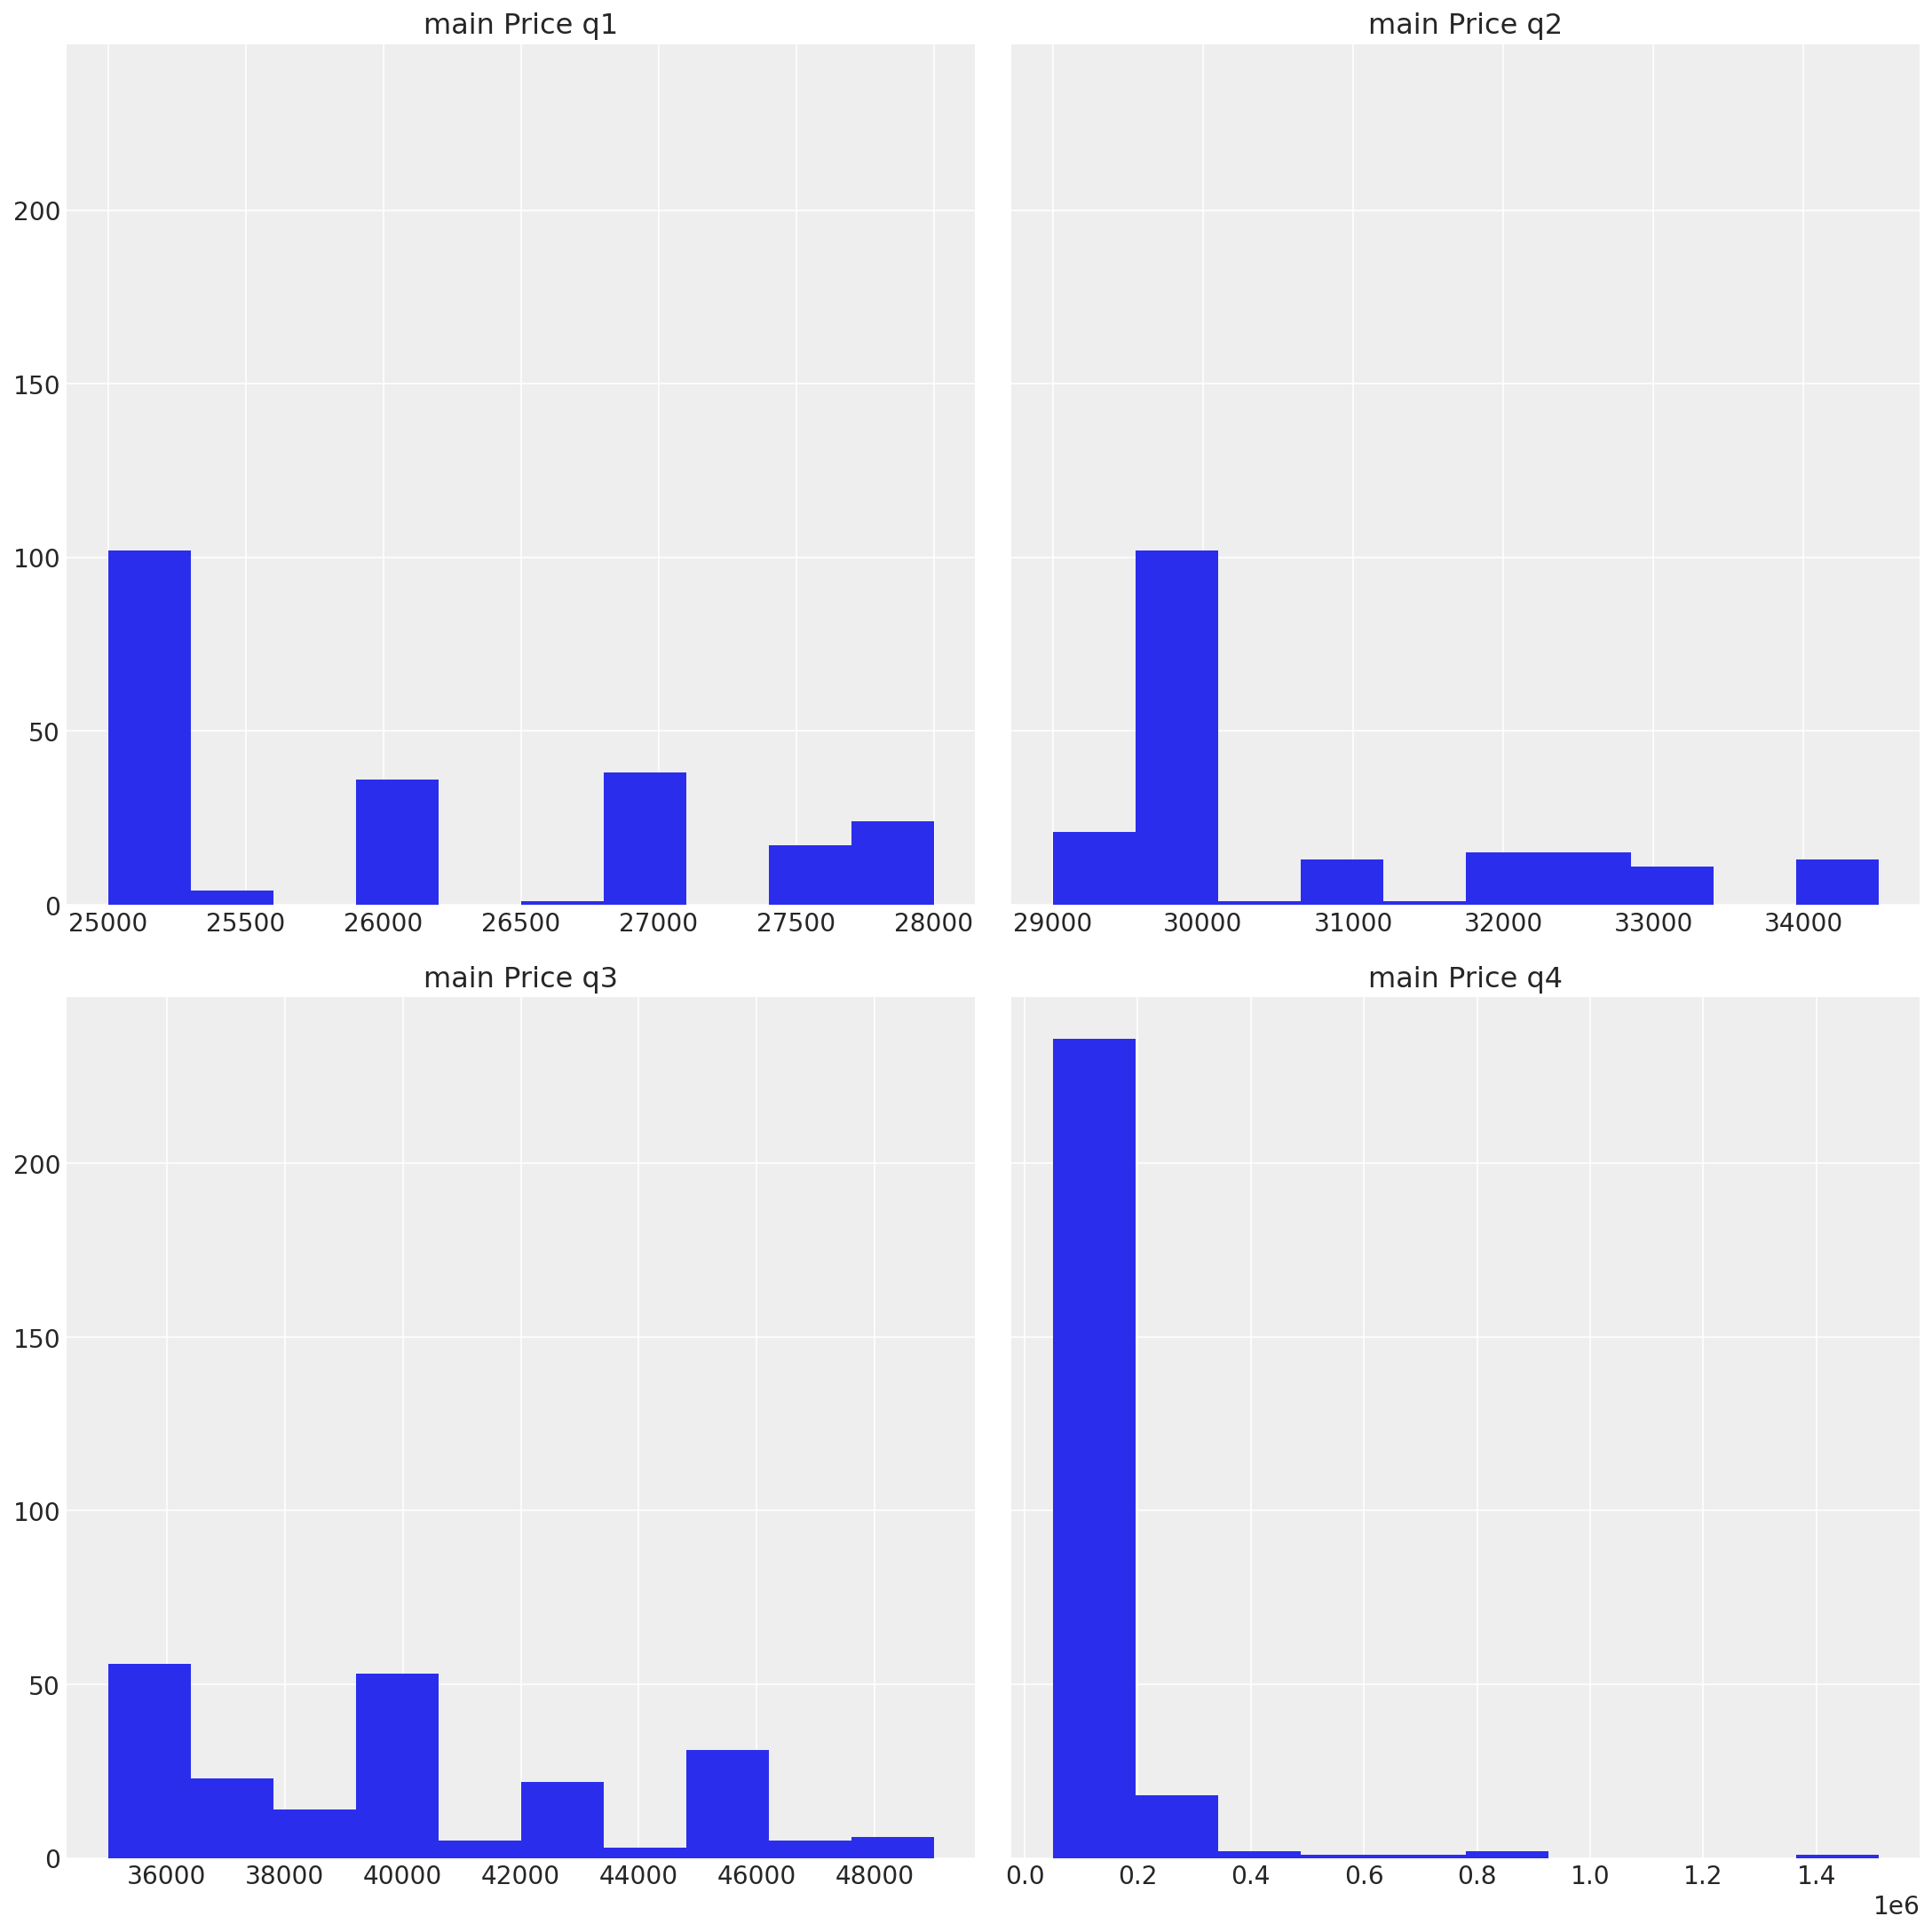

In [124]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))
ax1.hist(df_reduced_q1['main_price'], bins = 10)
ax1.set_title('main Price q1')

ax2.hist(df_reduced_q2['main_price'], bins = 10)
ax2.set_title('main Price q2')
ax3.hist(df_reduced_q3['main_price'], bins = 10)
ax3.set_title('main Price q3')
ax4.hist(df_reduced_q4['main_price'], bins = 10)
ax4.set_title('main Price q4')

In [130]:
df_reduced_cat1=df_reduced[(df_reduced.main_price <50000)]
df_reduced_cat2=df_reduced[(df_reduced.main_price >=50000)& (df_reduced.main_price <100000)]
df_reduced_cat3=df_reduced[(df_reduced.main_price >=100000)& (df_reduced.main_price <200000)]
df_reduced_cat4=df_reduced[(df_reduced.main_price >=200000)]

In [261]:
len(df_reduced_cat1),len(df_reduced_cat2),len(df_reduced_cat3),len(df_reduced_cat4)

(632, 178, 58, 25)

Text(0.5, 1.0, 'main Price cat4')

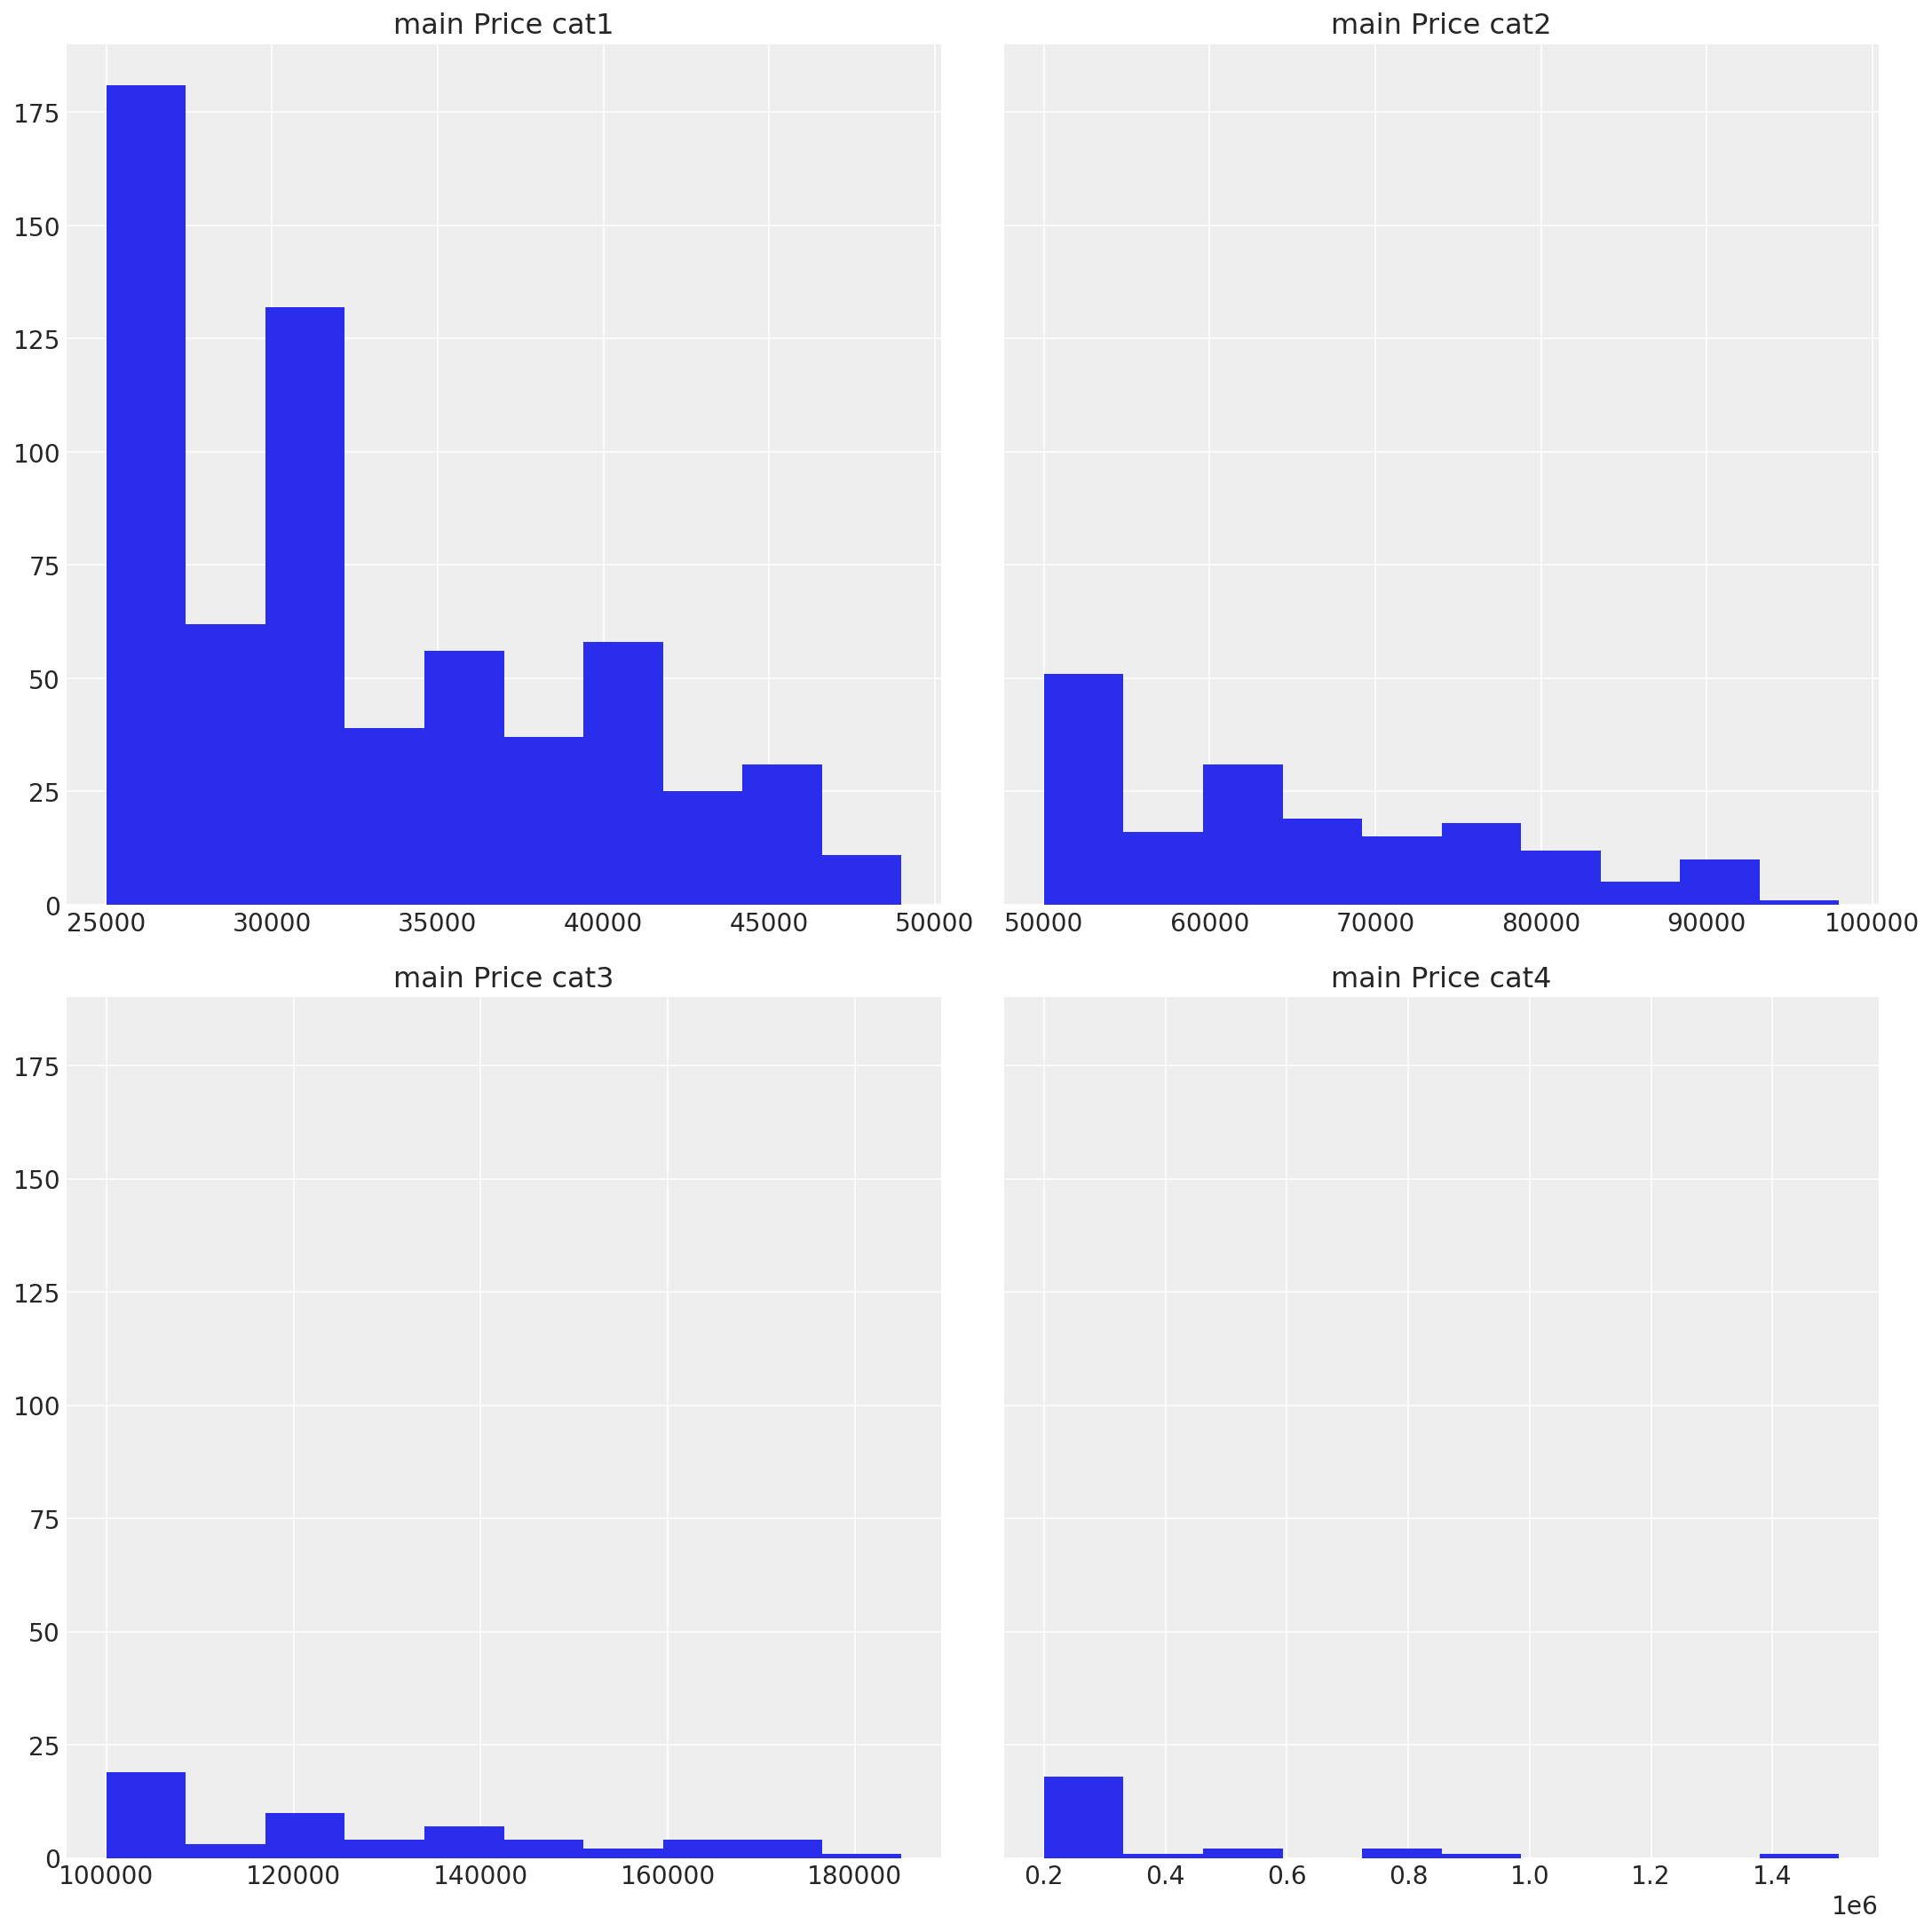

In [131]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))
ax1.hist(df_reduced_cat1['main_price'], bins = 10)
ax1.set_title('main Price cat1')

ax2.hist(df_reduced_cat2['main_price'], bins = 10)
ax2.set_title('main Price cat2')
ax3.hist(df_reduced_cat3['main_price'], bins = 10)
ax3.set_title('main Price cat3')
ax4.hist(df_reduced_cat4['main_price'], bins = 10)
ax4.set_title('main Price cat4')

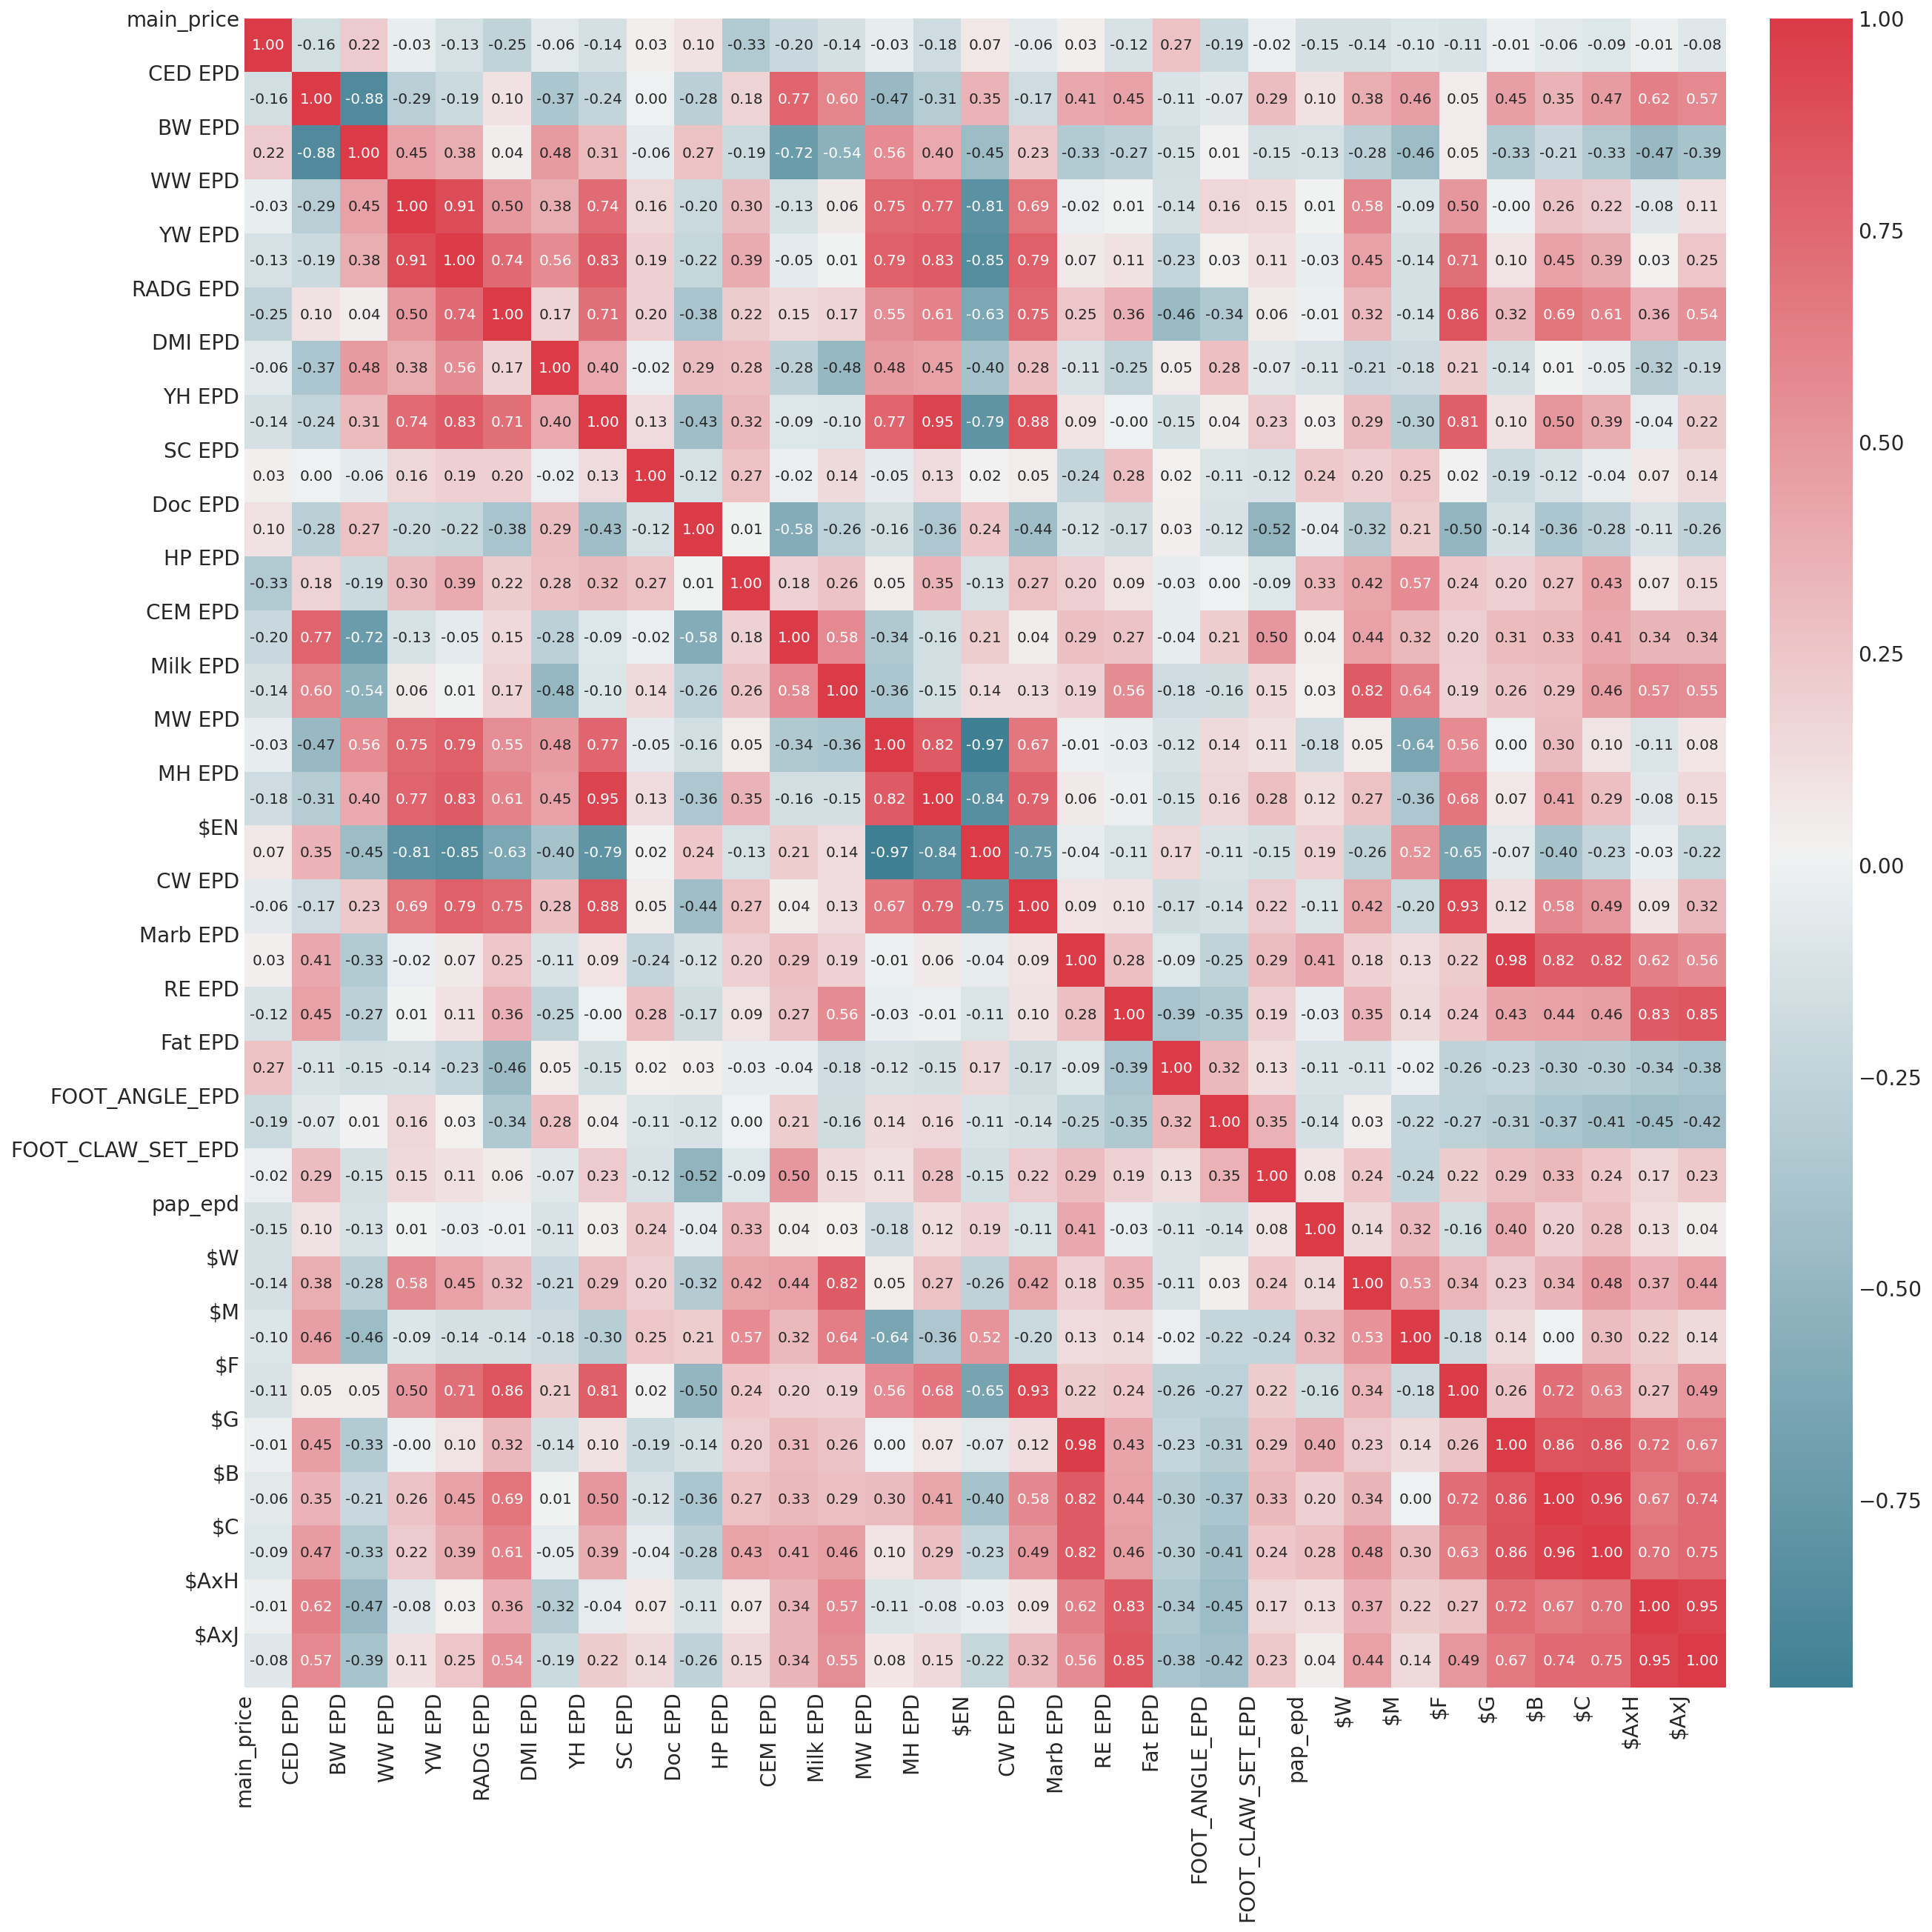

In [135]:
heatMap(df_reduced_cat4)

In [137]:
cols=list(df_reduced_cat4.columns)
df_normalized, dict_values=standarize(df_reduced_cat4,cols)
dict_values

{'$AxH': {'max': 252.0, 'mean': 129.24, 'min': -4.0, 'std': 76.4374908013077},
 '$AxJ': {'max': 232.0,
  'mean': 123.84,
  'min': -17.0,
  'std': 76.39136076808686},
 '$B': {'max': 240.0, 'mean': 170.0, 'min': 74.0, 'std': 39.825661743822074},
 '$C': {'max': 381.0, 'mean': 283.12, 'min': 183.0, 'std': 54.133569375511655},
 '$EN': {'max': 14.0, 'mean': -32.04, 'min': -50.0, 'std': 13.917854240746548},
 '$F': {'max': 143.0, 'mean': 104.2, 'min': 50.0, 'std': 21.120684963640105},
 '$G': {'max': 130.0, 'mean': 65.68, 'min': 25.0, 'std': 28.53319704017293},
 '$M': {'max': 101.0, 'mean': 62.68, 'min': 41.0, 'std': 16.1056925754012},
 '$W': {'max': 113.0, 'mean': 78.04, 'min': 52.0, 'std': 15.6377747777617},
 'BW EPD': {'max': 4.3, 'mean': 1.032, 'min': -2.3, 'std': 1.7040931116970495},
 'CED EPD': {'max': 16.0, 'mean': 8.08, 'min': -1.0, 'std': 6.123180001709351},
 'CEM EPD': {'max': 17.0, 'mean': 8.88, 'min': 1.0, 'std': 4.226109321823087},
 'CW EPD': {'max': 87.0, 'mean': 63.0, 'min': 24.0

Text(0.5, 1.0, 'Distribution of Main Price')

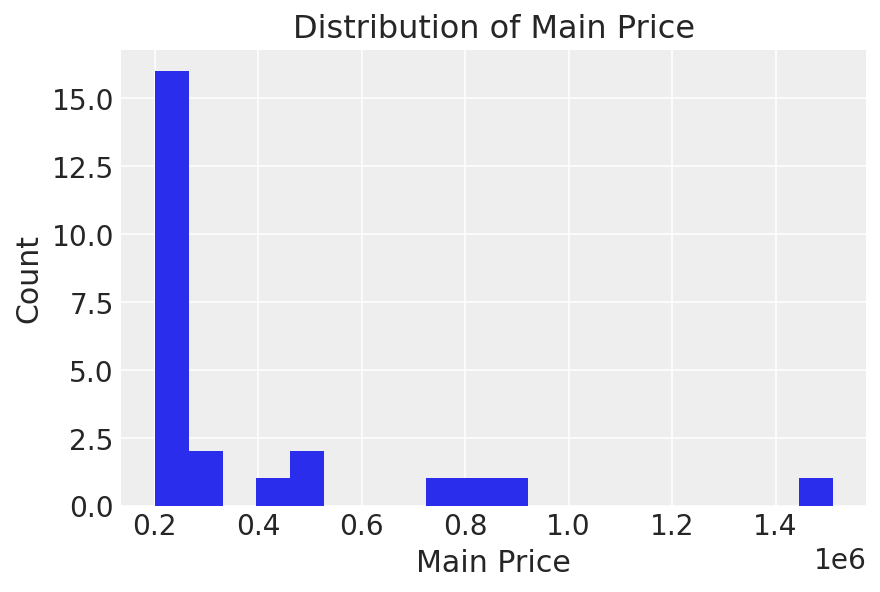

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced_cat4['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import scipy.stats as stats
from sklearn.preprocessing import  LabelEncoder
import pickle

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [141]:

# PyMC3 for Bayesian Inference
import pymc3 as pm
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [149]:
labels=df_reduced_cat1['main_price'] 

In [150]:
labels=df_reduced_cat1['main_price'] 
df_reduced_cat4.columns=['main_price','CED_EPD','BW_EPD','WW_EPD','YW_EPD','RADG_EPD',
'DMI_EPD','YH_EPD','SC_EPD','Doc_EPD','HP_EPD','CEM_EPD',
'Milk_EPD','MW_EPD','MH_EPD','EN','CW_EPD','Marb_EPD','RE_EPD',
'Fat_EPD','FOOT_ANGLE_EPD','FOOT_CLAW_SET_EPD','pap_epd','W','M',
'F','G','B','C','AxH','AxJ']

In [151]:
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_reduced_cat1, labels, 
                                                   
                                                    test_size = 0.25,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(474, 31)
(158, 31)


In [152]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    r2 = r2_score(true,predictions)
    
    return mae, rmse, r2

In [153]:
# Naive baseline is the median
median_pred = X_train['main_price'].mean()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['main_price']

# Display the naive baseline metrics
mb_mae, mb_rmse,r2_baseline = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))
print('Median Baseline R2: {:.4f}'.format(r2_baseline))

Median Baseline  MAE: 5301.9281
Median Baseline RMSE: 6274.9766
Median Baseline R2: -0.0032


In [147]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='main_price')
    X_test = X_test.drop(columns='main_price')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = r2_score(y_test,predictions)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,r2]
    
    # Median Value Baseline Metrics
    baseline = np.mean(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_r2 = r2_baseline
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2]
    
    return results

In [154]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,r2
Linear Regression,5334.31,6408.47,-0.0462992
ElasticNet Regression,5241.54,6320.71,-0.0178391
Random Forest,5206.65,6306.92,-0.0134034
Extra Trees,5266.14,6392.96,-0.0412412
SVM,4905.15,6563.04,-0.097381
Gradient Boosted,5287.43,6307.22,-0.0134976
Baseline,5301.93,6274.98,-0.00316245


In [155]:

## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [156]:

## load dependencies
import smogn
import pandas
import seaborn

In [162]:
df_reduced.reset_index(inplace=True)

In [163]:
df_reduced.columns

Index(['FY', 'main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [164]:
df_reduced.drop('FY', axis=1, inplace=True)

In [165]:
d750=df_reduced['main_price'].quantile(q=0.750)
d500=df_reduced['main_price'].quantile(q=0.500)
d250=df_reduced['main_price'].quantile(q=0.250)
dmin=df_reduced['main_price'].min()
dmax=df_reduced['main_price'].max()
dmin, d250, d500, d750, dmax

(25000, 29000.0, 35000.0, 50000.0, 1510000)

Text(0.5, 1.0, 'Distribution of Main Price')

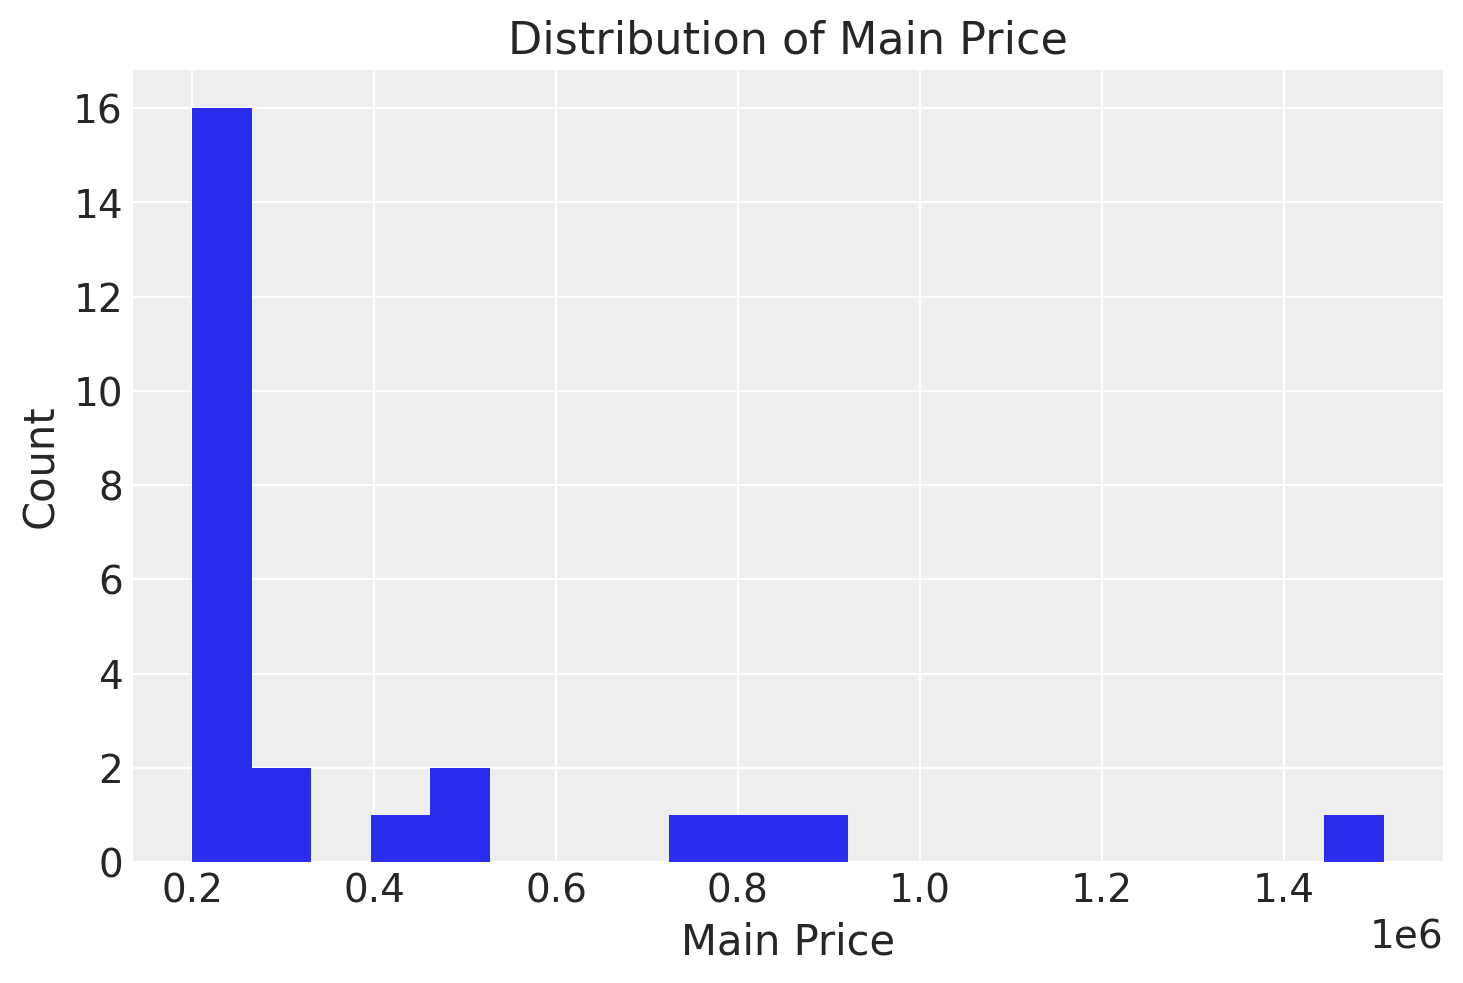

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced_cat4['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [184]:

## specify phi relevance values
rg_mtrx = [

    [29000,  0, 0],  ## under-sample
    [35000, 0, 0],  ## under-sample ("majority")
    [50000, 0, 0], ##over-sample ("minority")
    [300000, 1, 0],  ## over-sample ("minority")
    [400000, 1, 0],  ## over-sample ("minority")
    [500000, 1, 0],  ## over-sample ("minority")
    [700000, 1, 0],  ## over-sample ("minority")
    [800000, 1, 0],  ## over-sample ("minority")
    [900000, 1, 0],  ## over-sample ("minority")
    [1500000, 1, 0],  ## over-sample ("minority")
]

In [192]:
## conduct smogn
df_reduced_smogn = smogn.smoter(
    
    ## main arguments
    data = df_reduced,           ## pandas dataframe
    y = 'main_price',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

# ## conduct smogn
# df_reduced_smogn = smogn.smoter(
    
#     data = df_reduced_cat1,  ## pandas dataframe
#     y = 'main_price'  ## string ('header name')
# )

r_index: 100%|##########| 8/8 [00:00<00:00, 258.01it/s]


Text(0.5, 1.0, 'Distribution of Main Price')

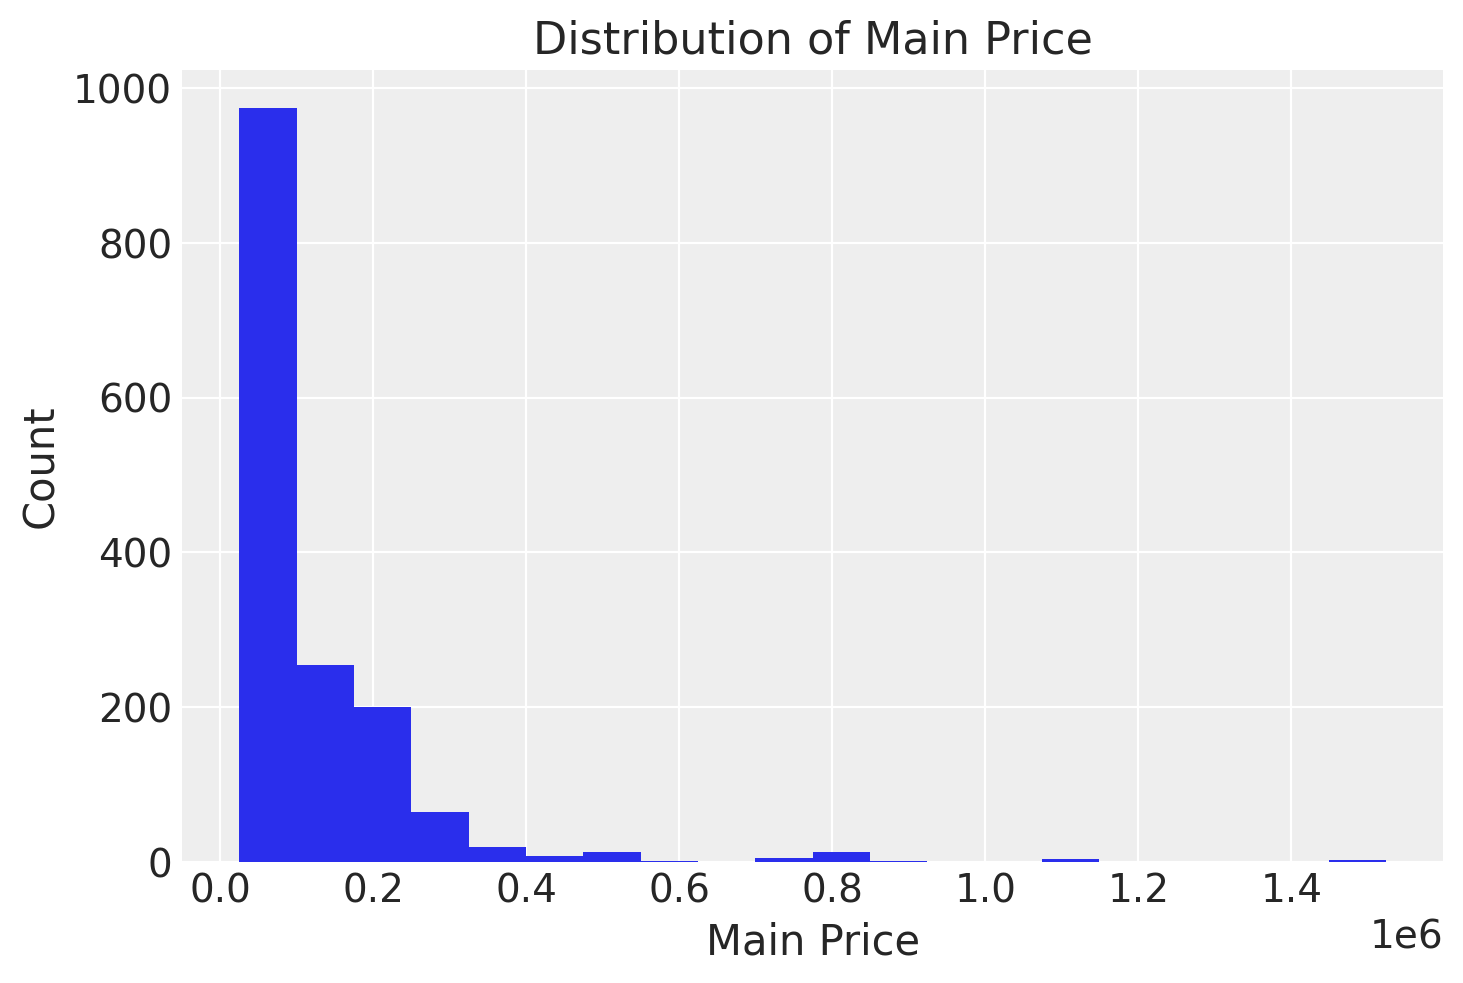

In [193]:
# Histogram of main_price
plt.hist(df_reduced_smogn['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [194]:
df_reduced_smogn.columns


Index(['main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [195]:
try:
  df_reduced_smogn.drop("level_0", axis=1,inplace=True)
except:
  pass

In [236]:
labels=df_reduced_smogn['main_price'] 
df_reduced_smogn.columns=['main_price','CED_EPD','BW_EPD','WW_EPD','YW_EPD','RADG_EPD',
'DMI_EPD','YH_EPD','SC_EPD','Doc_EPD','HP_EPD','CEM_EPD',
'Milk_EPD','MW_EPD','MH_EPD','EN','CW_EPD','Marb_EPD','RE_EPD',
'Fat_EPD','FOOT_ANGLE_EPD','FOOT_CLAW_SET_EPD','pap_epd','W','M',
'F','G','B','C','AxH','AxJ']

In [215]:
cols=list(df_reduced_smogn.columns)
df_normalized, dict_values=standarize(df_reduced_smogn,cols)
dict_values

{'AxH': {'max': 253.6421777555502,
  'mean': 124.84471498200475,
  'min': -127.0,
  'std': 59.84396101465723},
 'AxJ': {'max': 270.0,
  'mean': 120.35744251236044,
  'min': -107.0,
  'std': 64.58076601962206},
 'B': {'max': 242.0,
  'mean': 161.23452208629553,
  'min': 65.0,
  'std': 32.11347801316761},
 'BW_EPD': {'max': 7.5,
  'mean': 1.4867661280232487,
  'min': -5.4,
  'std': 1.606604058729182},
 'C': {'max': 381.0,
  'mean': 272.514290994796,
  'min': 142.0,
  'std': 44.51733971436838},
 'CED_EPD': {'max': 19.0,
  'mean': 7.08963938037108,
  'min': -11.0,
  'std': 4.798469967682555},
 'CEM_EPD': {'max': 19.0,
  'mean': 8.989199061393213,
  'min': -7.0,
  'std': 4.029375033078696},
 'CW_EPD': {'max': 111.0,
  'mean': 62.044340402837676,
  'min': 15.0,
  'std': 14.821915293052218},
 'DMI_EPD': {'max': 2.93,
  'mean': 1.4702440705540276,
  'min': -0.45,
  'std': 0.47772192730188034},
 'Doc_EPD': {'max': 39.0,
  'mean': 22.702097112988177,
  'min': -14.0,
  'std': 6.899882936427815},


In [216]:
labels=df_normalized['main_price'] 
df_normalized.columns=['main_price','CED_EPD','BW_EPD','WW_EPD','YW_EPD','RADG_EPD',
'DMI_EPD','YH_EPD','SC_EPD','Doc_EPD','HP_EPD','CEM_EPD',
'Milk_EPD','MW_EPD','MH_EPD','EN','CW_EPD','Marb_EPD','RE_EPD',
'Fat_EPD','FOOT_ANGLE_EPD','FOOT_CLAW_SET_EPD','pap_epd','W','M',
'F','G','B','C','AxH','AxJ']

In [237]:
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_reduced_smogn, labels, 
                                                   
                                                    test_size = 0.25,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(1172, 31)
(391, 31)


In [238]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,r2
Linear Regression,63868.9,132541,0.385328
ElasticNet Regression,63389.5,133754,0.374029
Random Forest,37853.3,90137.1,0.715718
Extra Trees,29733.3,71788.9,0.819675
SVM,89554.2,184941,-0.196763
Gradient Boosted,53220.2,117806,0.5144
Baseline,100667,169500,-0.00316245


In [199]:
!pip install xgboost

In [202]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# load the dataset
X= df_reduced_smogn.drop('main_price',axis=1)
y=labels
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) 

In [204]:
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 42760.265 (5837.264)


In [239]:
model = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=500, verbosity=2)

In [240]:
model.fit(X_train,  y_train)

[09:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[09:46:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=2)

In [241]:
yhat = model.predict(X_test)

In [242]:
from math import sqrt
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn import metrics
import numpy as np
metrics.r2_score(y_test, yhat)

0.999974494779561

Test Xgboost RMSE: 853.7751830874407 R2: 0.999974494779561


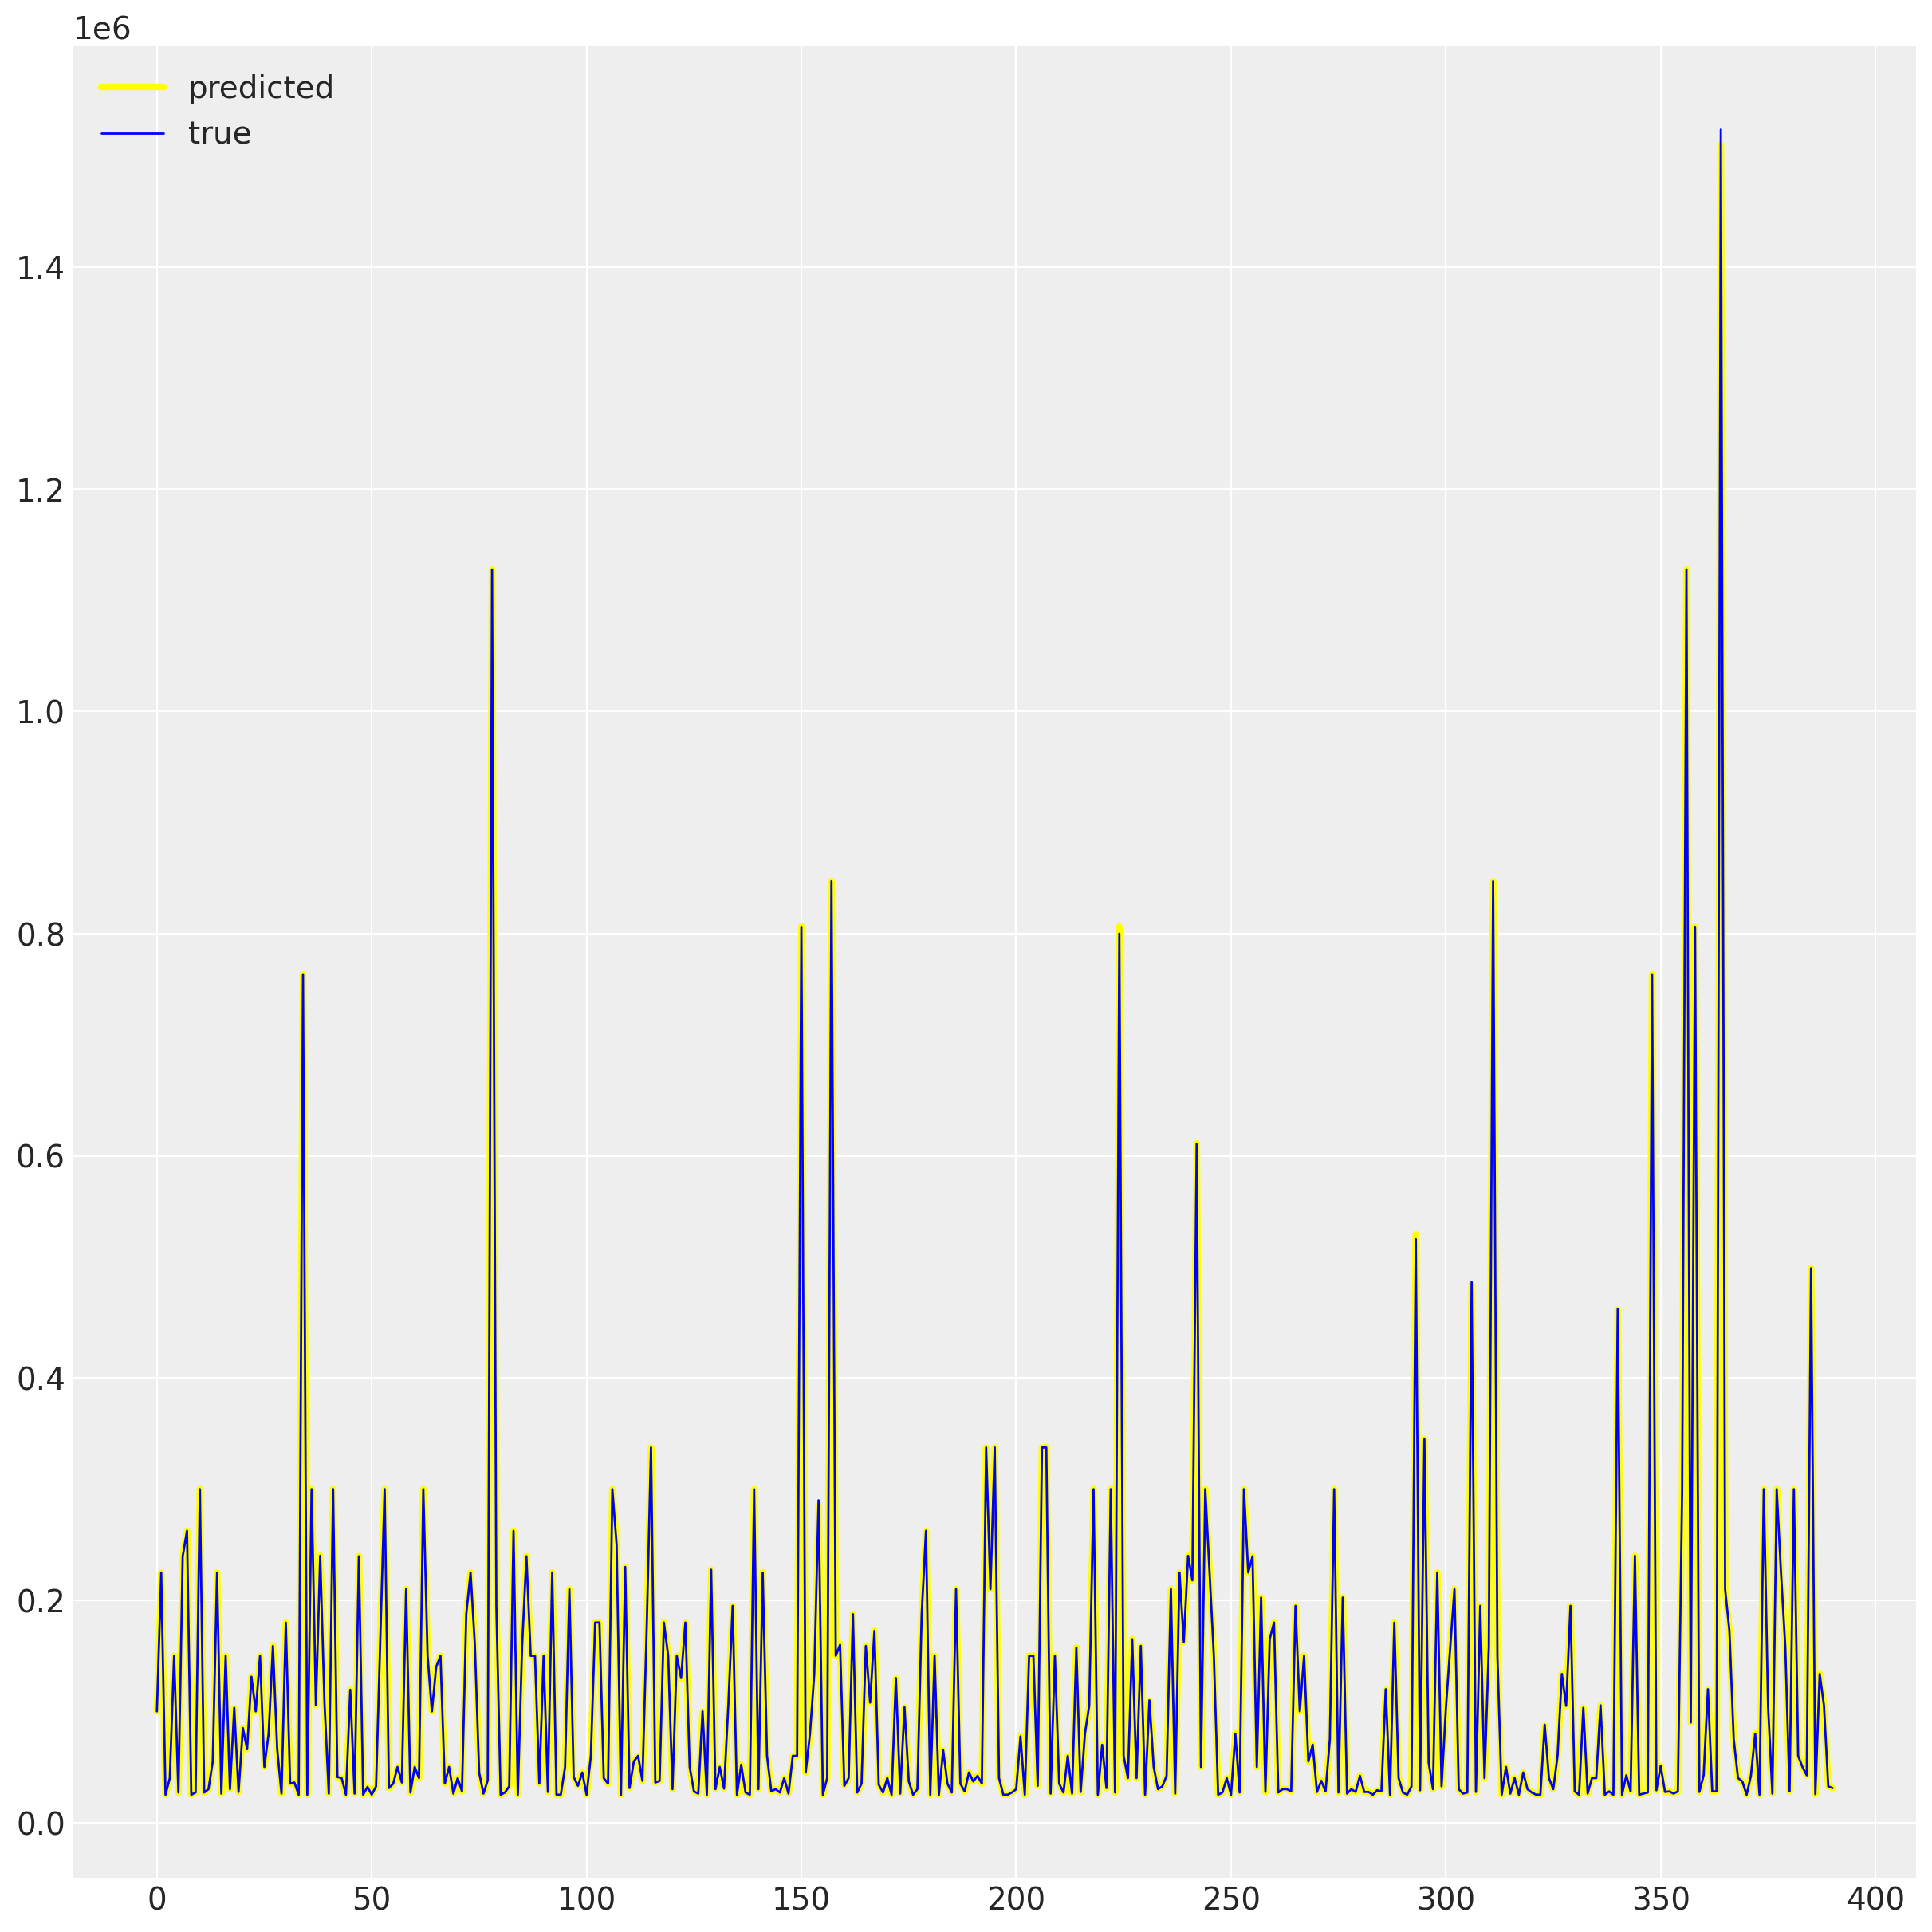

In [259]:
ny_test=np.array(y_test)

rmse = sqrt(mean_squared_error(y_test, yhat))

r2=r2_score(y_test, yhat)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(12,12))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")

plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()
